In [1]:
import pandas as pd
import numpy as np
from regression_inference import *
import matplotlib.pyplot as plt

In [2]:
gss = pd.read_csv('../../../Research Assessment/gss.csv', low_memory=False) 
gss_model = gss.loc[gss["yrint"] == 2010].dropna(subset=['paeduc', 'maeduc', 'age', 'educ'])
X, y = gss_model[['paeduc', 'maeduc', 'age']], gss_model['educ']

In [3]:
X_numpy = np.hstack([np.ones((np.asarray(X, dtype=float).shape[0], 1)), np.asarray(X, dtype=float)])
y_numpy = np.asarray(y, dtype=float)
np_model = LinearRegression().fit(X=X_numpy, y=y_numpy, feature_names=['paeduc','maeduc','age'], target_name="Education")
print(X_numpy, y_numpy)
print(np_model)

[[ 1.  8.  3. 31.]
 [ 1. 18.  6. 23.]
 [ 1.  2.  0. 82.]
 ...
 [ 1. 12. 14. 54.]
 [ 1.  6. 12. 57.]
 [ 1. 12. 12. 30.]] [16. 16. 10. ... 12. 16. 14.]
OLS Regression Results
---------------------------------------------
Dependent:                          Education
---------------------------------------------
 
const                               7.3256***
                                     (0.3684)
 
paeduc                              0.2144***
                                     (0.0241)
 
maeduc                              0.2569***
                                     (0.0271)
 
age                                 0.0241***
                                     (0.0043)

---------------------------------------------
R-squared                               0.276
Adjusted R-squared                      0.274
F Statistic                           177.548
Observations                         1402.000
Log Likelihood                      -3359.107
AIC                                 

In [4]:
X_const = X.copy()
X_const.insert(0, 'const', np.ones(len(X)))
model = LinearRegression().fit(X=X_const, y=y, alpha=0.05)
print(model)

OLS Regression Results
---------------------------------------------
Dependent:                               educ
---------------------------------------------
 
const                               7.3256***
                                     (0.3684)
 
paeduc                              0.2144***
                                     (0.0241)
 
maeduc                              0.2569***
                                     (0.0271)
 
age                                 0.0241***
                                     (0.0043)

---------------------------------------------
R-squared                               0.276
Adjusted R-squared                      0.274
F Statistic                           177.548
Observations                         1402.000
Log Likelihood                      -3359.107
AIC                                  6726.213
BIC                                  6747.196
TSS                                 13663.270
RSS                                  9893.727
ES

In [5]:
model

LinearRegression(feature_names=Index(['const', 'paeduc', 'maeduc', 'age'], dtype='object'), target='educ', alpha=0.05, theta=array([7.32564767, 0.21441961, 0.25693439, 0.02412266]), coefficients=array([0.21441961, 0.25693439, 0.02412266]), intercept=np.float64(7.3256476651517755), predictions=array([10.55961033, 13.28162833,  9.73254533, ..., 14.79838836,
       13.07036988, 13.70557564], shape=(1402,)), degrees_freedom=1398, log_likelihood=np.float64(-3359.1065993621455), aic=np.float64(6726.213198724291), bic=np.float64(6747.195818994669), p_value_coefficient=array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.90268838e-08]), variance_coefficient=array([[ 1.35692146e-01, -2.13408947e-03, -4.08009349e-03,
        -1.20819874e-03],
       [-2.13408947e-03,  5.83097905e-04, -4.47165379e-04,
         1.18030685e-05],
       [-4.08009349e-03, -4.47165379e-04,  7.35721575e-04,
         1.45253440e-05],
       [-1.20819874e-03,  1.18030685e-05,  1.45253440e-05,
         1.86963400e-05]

In [6]:
print(summary(model, np_model))

OLS Regression Results
------------------------------------------------------------
Dependent:                               educ      Education
------------------------------------------------------------
 
const                               7.3256***      7.3256***
                                     (0.3684)       (0.3684)
 
paeduc                              0.2144***      0.2144***
                                     (0.0241)       (0.0241)
 
maeduc                              0.2569***      0.2569***
                                     (0.0271)       (0.0271)
 
age                                 0.0241***      0.0241***
                                     (0.0043)       (0.0043)

------------------------------------------------------------
R-squared                               0.276          0.276
Adjusted R-squared                      0.274          0.274
F Statistic                           177.548        177.548
Observations                         1402.000       1

In [7]:
pd.DataFrame(model.inference_table())

,feature,coefficient,std_error,t_statistic,P>|t|,ci_low_0.05,ci_high_0.05
0,const,7.3256,0.3684,19.8870,0.000,6.603,8.0483
1,paeduc,0.2144,0.0241,8.8796,0.000,0.1671,0.2618
2,maeduc,0.2569,0.0271,9.4725,0.000,0.2037,0.3101
3,age,0.0241,0.0043,5.5789,0.000,0.0156,0.0326


In [8]:
pd.DataFrame(model.variance_inflation_factor())

,feature,VIF
0,paeduc,2.0233
1,maeduc,2.0285
2,age,1.0971


In [9]:
pd.DataFrame(model.robust_se(type="HC3"))

,feature,robust_se,robust_t,robust_p,ci_low_0.05,ci_high_0.05
0,const,0.434460,16.861504,0.000000e+00,6.473384,8.177911
1,paeduc,0.023602,9.084741,0.000000e+00,0.168120,0.260719
2,maeduc,0.029439,8.727734,0.000000e+00,0.199185,0.314683
3,age,0.004221,5.715290,1.336690e-08,0.015843,0.032402


In [10]:
X_const = X.copy()
X_const.insert(0, 'const', np.ones(len(X)))
robust_model = LinearRegression().fit(X_const, y, cov_type="HC3")
robust_model.target = "robust educ"
print(summary(model, robust_model))

OLS Regression Results
------------------------------------------------------------
Dependent:                               educ    robust educ
------------------------------------------------------------
 
const                               7.3256***      7.3256***
                                     (0.3684)       (0.4345)
 
paeduc                              0.2144***      0.2144***
                                     (0.0241)       (0.0236)
 
maeduc                              0.2569***      0.2569***
                                     (0.0271)       (0.0294)
 
age                                 0.0241***      0.0241***
                                     (0.0043)       (0.0042)

------------------------------------------------------------
R-squared                               0.276          0.276
Adjusted R-squared                      0.274          0.274
F Statistic                           177.548        177.548
Observations                         1402.000       1

In [11]:
pd.DataFrame(model.inference_table())

,feature,coefficient,std_error,t_statistic,P>|t|,ci_low_0.05,ci_high_0.05
0,const,7.3256,0.3684,19.8870,0.000,6.603,8.0483
1,paeduc,0.2144,0.0241,8.8796,0.000,0.1671,0.2618
2,maeduc,0.2569,0.0271,9.4725,0.000,0.2037,0.3101
3,age,0.0241,0.0043,5.5789,0.000,0.0156,0.0326


In [12]:
pd.DataFrame(robust_model.inference_table())

,feature,coefficient,std_error,t_statistic,P>|t|,ci_low_0.05,ci_high_0.05
0,const,7.3256,0.4345,16.8615,0.000,6.4734,8.1779
1,paeduc,0.2144,0.0236,9.0847,0.000,0.1681,0.2607
2,maeduc,0.2569,0.0294,8.7277,0.000,0.1992,0.3147
3,age,0.0241,0.0042,5.7153,0.000,0.0158,0.0324


In [13]:
model.feature_names[1:]

Index(['paeduc', 'maeduc', 'age'], dtype='object')

In [14]:
model.predict(np.array([[0, 0, 0], ]))

array([7.32564767])

In [15]:
prediction_set = [
    np.array([[0, 0, 0], ]),
    np.array([[X['paeduc'].mean(), X['maeduc'].mean(), X['age'].mean(),], ]),
    np.array([[X['paeduc'].mean(), 14,  X['age'].mean()], ]),
    np.array([[11.624822, 11.659058, 48.225392], ]),
    np.array([[8, 14,  X['age'].mean()], ]),
] 
predictions = pd.concat([pd.DataFrame(model.predict(test_set, return_table=True)) for test_set in prediction_set], ignore_index=True)
predictions

,features,prediction,std_error,t_statistic,P>|t|,ci_low_0.05,ci_high_0.05
0,"{'paeduc': '0.00', 'maeduc': '0.00', 'age': '0...",7.3256,0.3684,19.8870,0.000,6.6030,8.0483
1,"{'paeduc': '11.62', 'maeduc': '11.66', 'age': ...",13.9772,0.0710,196.7284,0.000,13.8378,14.1165
2,"{'paeduc': '11.62', 'maeduc': '14.00', 'age': ...",14.5786,0.0953,152.9974,0.000,14.3917,14.7656
3,"{'paeduc': '11.62', 'maeduc': '11.66', 'age': ...",13.9772,0.0710,196.7284,0.000,13.8378,14.1165
4,"{'paeduc': '8.00', 'maeduc': '14.00', 'age': '...",13.8014,0.1560,88.4816,0.000,13.4954,14.1074


In [16]:
model.feature_names[1:]

Index(['paeduc', 'maeduc', 'age'], dtype='object')

In [17]:
'''Incremental predictions holding other values at sample mean'''

prediction_set = [
    (np.array([[i, X['maeduc'].mean(), X['age'].mean()],]))
    for i in range(int(X['paeduc'].min()), int(X['paeduc'].max())+1)
    ] 
predictions = pd.concat([pd.DataFrame(model.predict(i, return_table=True)) for i in prediction_set], ignore_index=True)
predictions

,features,prediction,std_error,t_statistic,P>|t|,ci_low_0.05,ci_high_0.05
0,"{'paeduc': '0.00', 'maeduc': '11.66', 'age': '...",11.4846,0.2896,39.6620,0.000,10.9166,12.0526
1,"{'paeduc': '1.00', 'maeduc': '11.66', 'age': '...",11.6990,0.2662,43.9452,0.000,11.1768,12.2212
2,"{'paeduc': '2.00', 'maeduc': '11.66', 'age': '...",11.9134,0.2430,49.0201,0.000,11.4367,12.3902
3,"{'paeduc': '3.00', 'maeduc': '11.66', 'age': '...",12.1278,0.2201,55.1134,0.000,11.6962,12.5595
4,"{'paeduc': '4.00', 'maeduc': '11.66', 'age': '...",12.3423,0.1974,62.5393,0.000,11.9551,12.7294
5,"{'paeduc': '5.00', 'maeduc': '11.66', 'age': '...",12.5567,0.1750,71.7361,0.000,12.2133,12.9001
6,"{'paeduc': '6.00', 'maeduc': '11.66', 'age': '...",12.7711,0.1533,83.3162,0.000,12.4704,13.0718
7,"{'paeduc': '7.00', 'maeduc': '11.66', 'age': '...",12.9855,0.1324,98.1061,0.000,12.7259,13.2452
8,"{'paeduc': '8.00', 'maeduc': '11.66', 'age': '...",13.1999,0.1127,117.0875,0.000,12.9788,13.4211
9,"{'paeduc': '9.00', 'maeduc': '11.66', 'age': '...",13.4144,0.0952,140.8904,0.000,13.2276,13.6011


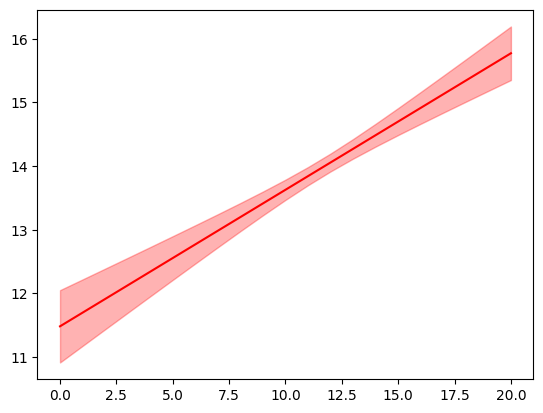

In [18]:
plt.plot(list(range(0, len(predictions['prediction']))), predictions['prediction'], color="red", label=" ")
plt.fill_between(list(range(0, len(predictions['prediction']))), predictions['ci_low_0.05'], predictions['ci_high_0.05'], color="red", alpha=0.3)
plt.show()

In [19]:
dydx = [predictions['prediction'][i+1] - predictions['prediction'][i] for i in list(range(0, len(predictions['prediction'])-1))]
dydx = dydx.copy()
dydx.insert(0, 0)

ci_low_dydx, ci_high_dydx = predictions['ci_low_0.05'], predictions['ci_high_0.05']
dydx_low_ci = [ci_low_dydx[i+1] - ci_low_dydx[i] for i in list(range(0, len(predictions['prediction'])-1))]
dydx_high_ci = [ci_high_dydx[i+1] - ci_high_dydx[i] for i in list(range(0, len(predictions['prediction'])-1))]

dydx_low_ci.insert(0, 0)
dydx_high_ci.insert(0, 0)

derivative_predictions = predictions[['features']].copy()
derivative_predictions['derivative'] = dydx
derivative_predictions['ci_low_dydx'] = dydx_low_ci
derivative_predictions['ci_high_dydx'] = dydx_high_ci

In [20]:
derivative_predictions

,features,derivative,ci_low_dydx,ci_high_dydx
0,"{'paeduc': '0.00', 'maeduc': '11.66', 'age': '...",0.0000,0.0000,0.0000
1,"{'paeduc': '1.00', 'maeduc': '11.66', 'age': '...",0.2144,0.2602,0.1686
2,"{'paeduc': '2.00', 'maeduc': '11.66', 'age': '...",0.2144,0.2599,0.1690
3,"{'paeduc': '3.00', 'maeduc': '11.66', 'age': '...",0.2144,0.2595,0.1693
4,"{'paeduc': '4.00', 'maeduc': '11.66', 'age': '...",0.2145,0.2589,0.1699
5,"{'paeduc': '5.00', 'maeduc': '11.66', 'age': '...",0.2144,0.2582,0.1707
6,"{'paeduc': '6.00', 'maeduc': '11.66', 'age': '...",0.2144,0.2571,0.1717
7,"{'paeduc': '7.00', 'maeduc': '11.66', 'age': '...",0.2144,0.2555,0.1734
8,"{'paeduc': '8.00', 'maeduc': '11.66', 'age': '...",0.2144,0.2529,0.1759
9,"{'paeduc': '9.00', 'maeduc': '11.66', 'age': '...",0.2145,0.2488,0.1800


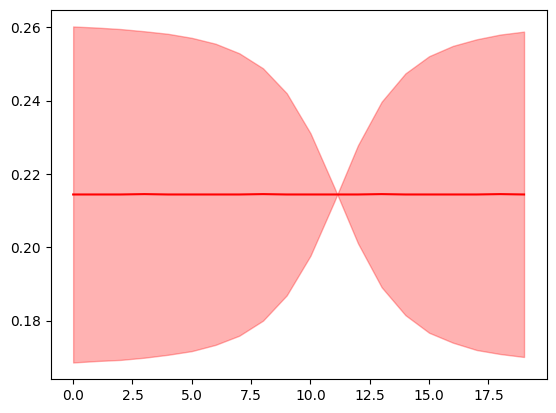

In [21]:
derivatives_trim = derivative_predictions['derivative'][1:]
dydx_ci_low_trim, dydx_ci_high_trim = derivative_predictions['ci_low_dydx'][1:], derivative_predictions['ci_high_dydx'][1:]

plt.plot(list(range(0, len(derivatives_trim))), derivatives_trim, color="red", label=" ")
plt.fill_between(list(range(0, len(derivatives_trim))), dydx_ci_low_trim, dydx_ci_high_trim, color="red", alpha=0.3)
plt.show()